# Data Science Graded Challenge 2 Phase 1

by: Muhammad Farhan Zahirsyah

Batch 10

---
### Desctription





### Objective
- Memprediksi biaya jasa taksi online Uber dan Lyft


### Problem Statement
- bagaimana cara memprediksi biaya taksi online Uber dan Lyft


---


## I. Import Library

In [186]:
# essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import statsmodels.api as sm
import sklearn

# scikit-learn library
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

# removing warnings in cell
import warnings
warnings.filterwarnings('ignore')

# capping outlier library winsorizer
from feature_engine.outliers import Winsorizer


Memangil version, apabila program ini digunakan di masa mendatang kemungkinan library sudah ada pembaharuan dan versi yang digunakan sekarang sudah deprecated

In [3]:
print('Pandas Version     :',pd.__version__)
print('Numpy Version      :',np.__version__)
print('Statsmodels Version:',sm.__version__)
print('Matplotlib Version :',matplotlib.__version__)
print('Seaborn Version    :',sns.__version__)
print('Sklearn Version    :',sklearn.__version__)

Pandas Version     : 1.3.4
Numpy Version      : 1.20.3
Statsmodels Version: 0.12.2
Matplotlib Version : 3.4.3
Seaborn Version    : 0.11.2
Sklearn Version    : 0.24.2


## II. Data Loading

mengambil dataset dari path lokal

In [5]:
weather_df_ori = pd.read_csv('../../../big_dataset/weatherAUS.csv')

In [6]:
weather_df_ori.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


diatas adalah 5 baris pertama dataset

In [8]:
weather_df_ori.head(5).T

,0,1,2,3,4
Date,2008-12-01,2008-12-02,2008-12-03,2008-12-04,2008-12-05
Location,Albury,Albury,Albury,Albury,Albury
MinTemp,13.4,7.4,12.9,9.2,17.5
MaxTemp,22.9,25.1,25.7,28.0,32.3
Rainfall,0.6,0.0,0.0,0.0,1.0
Evaporation,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustDir,W,WNW,WSW,NE,W
WindGustSpeed,44.0,44.0,46.0,24.0,41.0
WindDir9am,W,NNW,W,SE,ENE


Diatas menampilkan 3 data teratas dengan menampilkan nama seluruh kolom

In [9]:
weather_df_ori.shape

(145460, 23)

Terdapat 693071 baris data dengan 57 kolom

In [10]:
# mengelompokan data berdasarkan datatype
num_columns = weather_df_ori.select_dtypes(include=np.number).columns.tolist()
obj_columns = weather_df_ori.select_dtypes(include=['object']).columns.tolist()
weather_df_ori[num_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [11]:
len(num_columns)

16

Terdapat 46 kolom berjenis number

In [12]:
weather_df_ori[obj_columns].describe().T

,count,unique,top,freq
Date,145460,3436,2013-11-12,49
Location,145460,49,Canberra,3436
WindGustDir,135134,16,W,9915
WindDir9am,134894,16,N,11758
WindDir3pm,141232,16,SE,10838
RainToday,142199,2,No,110319
RainTomorrow,142193,2,No,110316


In [13]:
len(obj_columns)

7

terdapat 11 kolom dengan data types categorical 

In [29]:
for i in obj_columns[:]:
    print(i)
    print(weather_df_ori[i].unique())
    print("-"*50)

Date
['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']
--------------------------------------------------
Location
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
--------------------------------------------------
WindGustDir
['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
--------------------------------------------------
WindDir9am
['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' '

Diatas adalah isi dari kolom yang berdatatypes categorical

In [26]:
weather_df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [25]:
weather_df_ori.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [24]:
(weather_df_ori.isnull().sum()/len(weather_df_ori))*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

terdapat missing 55095 di kolom price. ini bisa digunakan sebagai data test. namun dengan data ini tidak bisa dicek modelnya apabila digunakan data test tersebut. karena price nya hilang dan tidak bisa diketahui akurasi dari model tersebut.

In [16]:
weather_df_ori.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Diatas adalah list dari kolom yang ada didalam dataset

## III. Exploratory Data Analysis



maka dari itu data inference akan diambil 10 buah dari data_complete.

In [28]:
data_inf = weather_df_ori.sample(10, random_state=1)
data_inf

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
26191,2014-10-24,Penrith,16.6,30.5,16.2,NaN,NaN,NE,31.0,E,...,73.0,45.0,NaN,NaN,NaN,NaN,20.3,29.4,Yes,No
25452,2012-08-17,Penrith,3.5,21.2,0.0,NaN,NaN,N,74.0,N,...,68.0,43.0,NaN,NaN,NaN,NaN,12.0,15.1,No,No
96666,2009-06-12,Adelaide,9.1,13.8,0.0,1.6,NaN,NE,43.0,NNE,...,56.0,50.0,1017.9,1012.3,NaN,NaN,10.6,13.6,No,Yes
56739,2013-08-23,Ballarat,6.5,11.2,4.8,NaN,NaN,W,52.0,W,...,99.0,95.0,1010.4,1012.6,8.0,8.0,8.5,10.8,Yes,Yes
88977,2014-01-10,Cairns,25.1,33.1,0.2,8.6,3.3,SSE,46.0,SSE,...,66.0,53.0,1011.5,1008.8,7.0,7.0,29.5,32.0,No,Yes
55269,2009-05-17,Ballarat,7.0,13.1,1.6,NaN,NaN,WSW,31.0,WSW,...,99.0,76.0,1022.3,1020.8,8.0,8.0,9.4,12.5,Yes,No
73521,2013-06-28,Nhil,2.3,16.9,0.0,NaN,NaN,W,15.0,E,...,91.0,54.0,1024.7,1023.4,NaN,NaN,3.8,16.8,No,No
11210,2015-02-20,CoffsHarbour,20.4,23.7,22.2,NaN,NaN,E,54.0,WSW,...,96.0,94.0,NaN,NaN,NaN,NaN,21.0,23.6,Yes,Yes
94502,2012-05-06,Townsville,17.5,28.6,0.0,6.4,10.7,E,39.0,SE,...,48.0,42.0,1016.1,1013.0,1.0,1.0,24.8,28.1,No,No
144644,2015-04-02,Uluru,22.3,28.0,0.0,NaN,NaN,SSE,31.0,SSE,...,53.0,40.0,1017.3,1014.8,7.0,8.0,23.4,27.4,No,No


In [32]:
weather_df = weather_df_ori.drop(data_inf.index)
weather_df.shape

(145450, 23)

dilakukan droping row dari data complete untuk data inference

In [33]:
weather_df.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
print(weather_df.shape)
print(data_inf.shape)

(145450, 23)
(10, 23)


kemudian mereset index data_complete dan data_inf agar data inference seperti sebuah data baru

## IV. Data Preprocessing

### A. Split data

melakukan train test split pada data complete untuk dibagi menjadi data train dan data test

In [36]:
x = weather_df.drop(['RainTomorrow'],axis=1)
y = weather_df['RainTomorrow']


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)
print(x_train.shape)
print(x_test.shape)

(116360, 22)
(29090, 22)


data dibagi menjadi 80% untuk train dan 20% untuk test

In [37]:
num_columns = x_train.select_dtypes(include=np.number).columns.tolist()

dilakukan kembali arranging kelompok kolom numerical setelah kolom price di drop

In [38]:
obj_columns = x_train.select_dtypes(include=['object']).columns.tolist()
obj_columns

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

### B. Initial correlation monitoring

akan dicoba melakukan heatmap pearson correlation pada x train yang pada akhirnya akan dibandingkan dengan setelah outlier handling

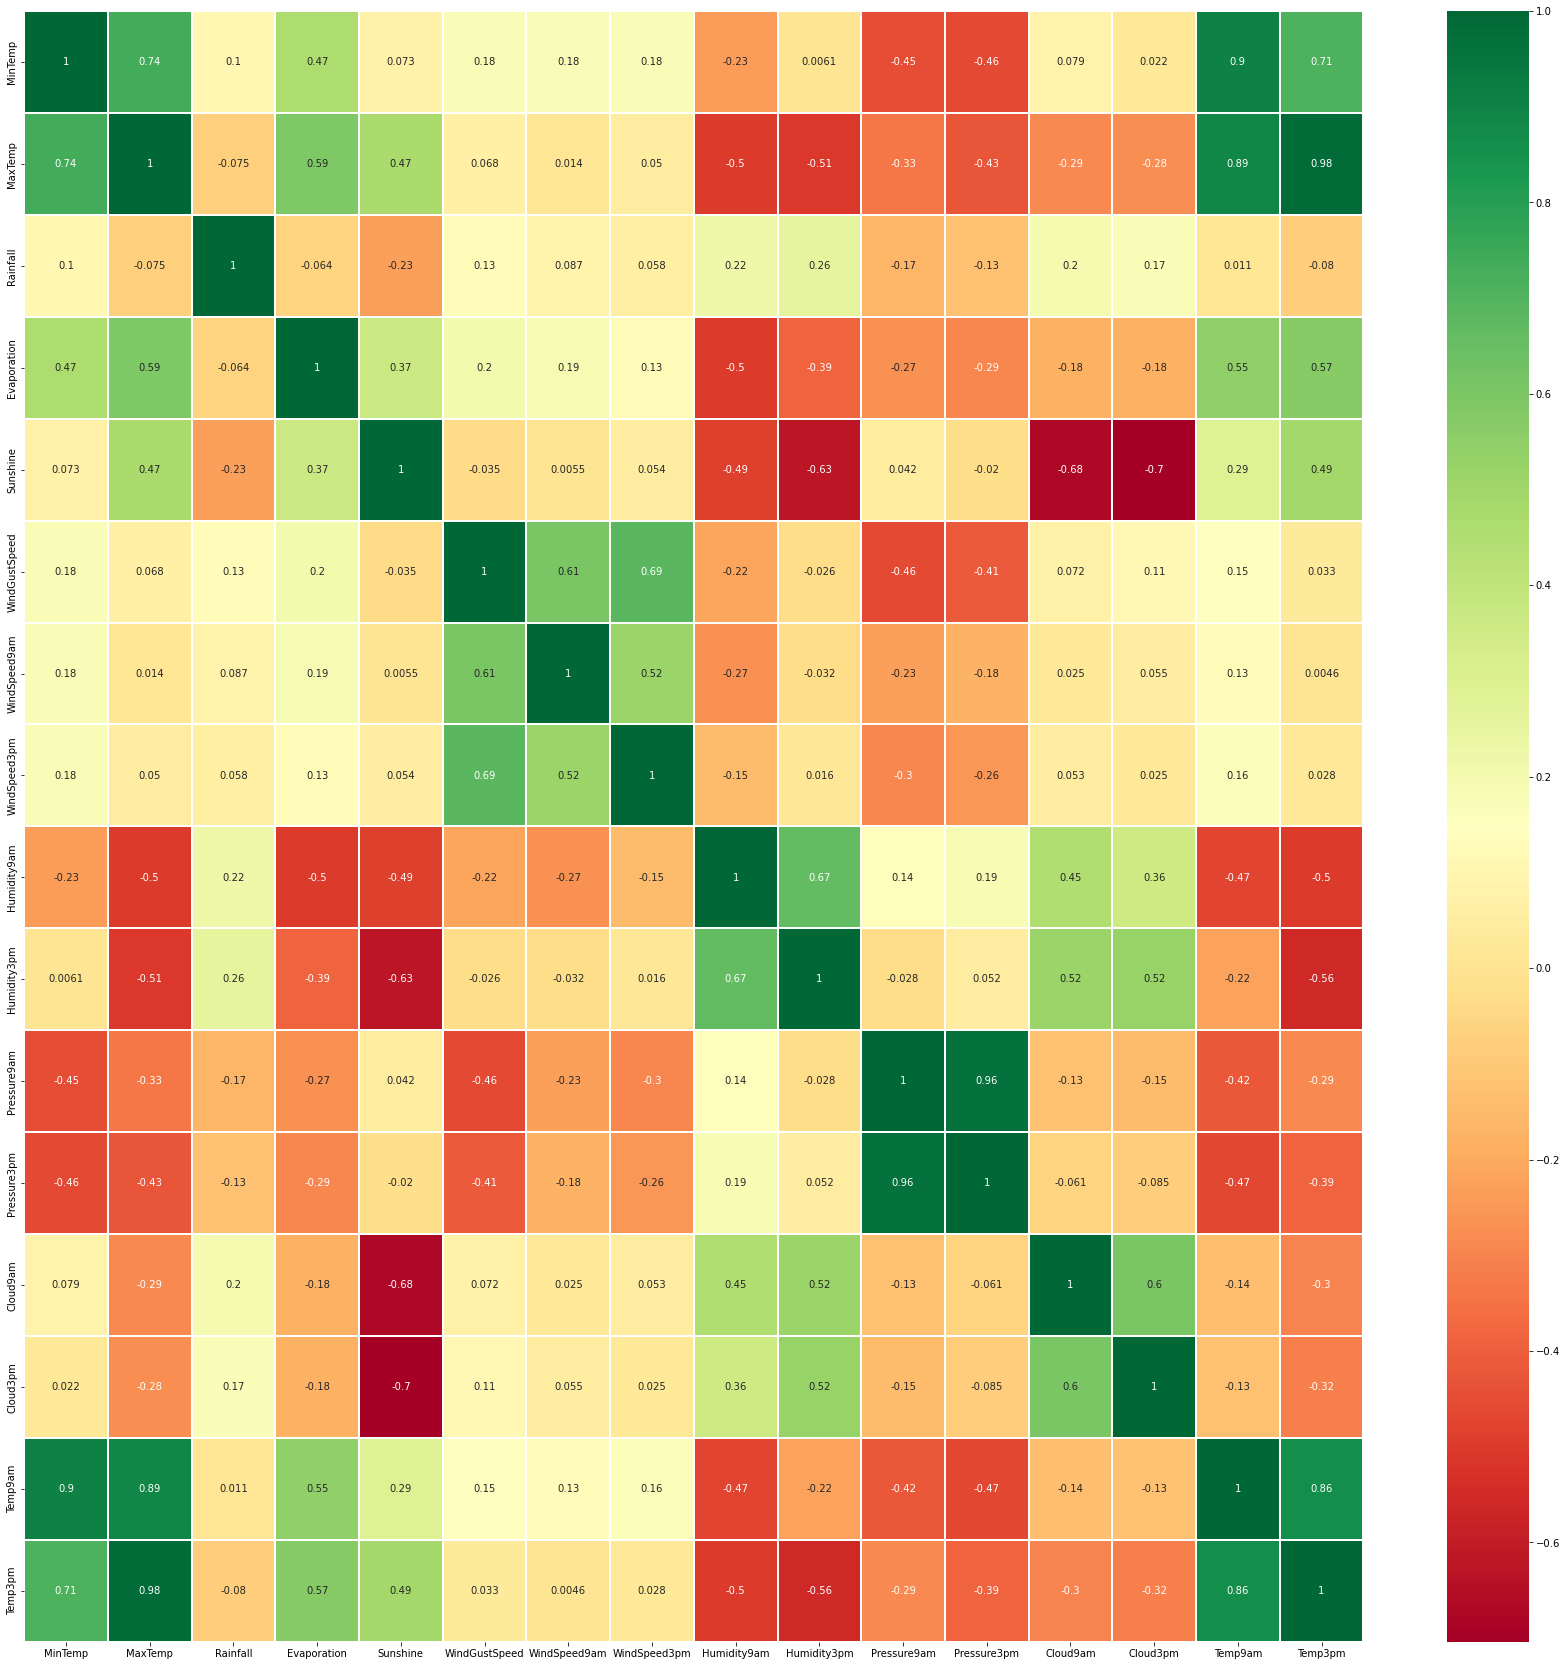

In [39]:
fig = plt.figure(figsize=(30,30))
fig = sns.heatmap(weather_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
plt.show()

Heatmap diatas adalah heatmap sebelum dilakukan handling outliers dan handling missing value. terlihat korelasi distance dan surge_multiplier dengan price lebih tinggi daripada feature lainnya. namun nilai ini bisa berubah apabila setelah dilakukan handling outliers dan handling missing value

## V. Outlier Handling

### A. Outliers Function

In [71]:
def iqr(data,column):
    lower_limit= data[column].quantile(0.25) - 3*(data[column].quantile(0.75)-data[column].quantile(0.25))
    upper_limit= data[column].quantile(0.75) + 3*(data[column].quantile(0.75)-data[column].quantile(0.25))
    return lower_limit, upper_limit

membuat fungsi untuk data yang skew dan dilakukan pencarian batas bawah dan batas atas menggunakan IQR

>if a data point is below Q1 − 1.5×IQR or above Q3 + 1.5×IQR, it is viewed as being too far from the central values to be reasonable. and if If your assignment is having you consider not only outliers but also "extreme values", then the values for Q1 − 1.5×IQR and Q3 + 1.5×IQR are the "inner" fences and the values for Q1 − 3×IQR and Q3 + 3×IQR are the "outer" fences.[1]

agar data tidak banyak yang keluar dari range iqr maka saya mengambil 3xIQR yang didalamnya juga memasukan nilai ekstrim.

In [72]:
def lcl_ucl_std(data,column):
    lcl = data[column].mean() - 1.5*data[column].std()
    ucl = data[column].mean() + 1.5*data[column].std()
    return lcl,ucl

membuat fungsi untuk data yang berdistribusi normal untuk mencari batas atas dan batas bawah menggunakan standard deviasi.



In [73]:
def perc_outliers_iqr(data,column):
    lcl,ucl = iqr(data,column)
    try:
        result = data[column][(data[column]<=lcl) | (data[column]>=ucl)].count()/len(data[column])
    except:
        result = 0
    return result

def perc_outliers_std(data,column):
    lcl,ucl = lcl_ucl_std(data,column)
    try:
        result = data[column][(data[column]<=lcl) | (data[column]>=ucl)].count()/len(data[column])
    except:
        result = 0
    return result

membuat fungsi untuk mengetahui berapa banyak persentase outliers untuk masing-masing distribusi yang skewed dan normal. bila tidak terdapat outliers dari kolom tersebut maka nilainya akan menjadi 0

In [74]:
def outliers(data,column,distr):
    if distr <= -0.5 or distr >= 0.5:
        lcl,ucl = iqr(data,column)
        percentage = perc_outliers_iqr(data,column)
    elif distr > -0.5 or distr < 0.5:
        lcl,ucl = lcl_ucl_std(data,column)
        percentage = perc_outliers_std(data,column)
    return lcl,ucl,percentage

membuat fungsi untuk menyatukan fungsi IQR dan std deviasi. dengan pemilihan fungsi dilihat dari skewness data. apabila diatas -0.5 dan dibawah 0.5 maka data tersebut berdistribusi normal. sedangkan diluar dari nilai tersebut maka data berdistribusi skew

### B. Creating Treatment Table

untuk mempermudah kolom mana saja yang skew atau normal dan treatment apa saja yang harus dilakukan, saya membuat tabel treatment yang isi nya adalah kolom-kolom numerik dengan deskripsi sebagai berikut:

|Nama Kolom | Deskripsi |
|---|---|
|name| nama kolom numerik|
| distr| nilai skew distribusi|
|percentage| persentasi jumlah outlier yang diluar dari batas bawah dan batas atas|
|skewness| nama distribusi |
|lcl| lower control limit/ batas bawah|
|ucl| upper control limit/ batas atas|
|treatment| treatment yang harus dilakukan|

In [103]:
skew = []
for i in x_train[num_columns]:
    skew.append(x_train[i].skew())

menambah data kolom distribution dengan melihat skew pada kolom numerik x_train

In [104]:
percentage = []
j = 0
for i in x_train[num_columns]:
    percentage.append(outliers(x_train,i,skew[j])[2])
    j += 1

menambah data kolom percentage dengan menggunakan fungsi outliers

In [105]:
treatment = []
j=0
for i in x_train[num_columns]:
    if percentage[j] == 0:
        treatment.append('No outliers')
    elif percentage[j] <= 0.05:
        treatment.append('trim')
    elif percentage[j] <= 0.15:
        treatment.append('capping')
    elif percentage[j] > 0.15:
        treatment.append('do not treat')
    j += 1

pada kolom percentage yang nilainya 0 itu didapatkan dari fungsi outliers. telah dijelaskan pada markdown fungsi oultiers bahwa 0 merupakan tidak ada outliers. 

nilai percentage outliers dibawah 0.05 atau 5% dari kolom data artinya kita bisa membuang data tersebut. 

nilai percentage outliers diatas 5% sampai 15% dari kolom data artinya kita bisa melakukan capping pada data tersebut.

nilai percentage outliers diatas 15% dari kolom data artinya kita harus membiarkan data tersetbut. karena bisa jadi ini bukanlah anomali outliers.

In [106]:
lcl = []
j = 0
for i in x_train[num_columns]:
    lcl.append(outliers(x_train,i,skew[j])[0])
    j += 1


menambah data kolom lcl dengan menggunakna fungsi outliers

In [107]:
ucl = []
j = 0
for i in x_train[num_columns]:
    ucl.append(outliers(x_train,i,skew[j])[1])
    j += 1

menambah data kolom ucl dengan menggunakan fungsi outliers

In [108]:
distribution = []
j = 0
for i in x_train[num_columns]:
    if skew[j] >= -0.5 and skew[j] <= 0.5:
        distribution.append('normal')
    else: 
        distribution.append('skewed')
    j += 1


menambah kolom skewed dengan melihat nilai skewed. bila didalam nilai -0.5 sampai 0.5 maka berdistribusi normal. diluar nilai tersebut maka berdistribusi skewed

In [109]:
outlier_treatment = pd.DataFrame()
outlier_treatment['name'] = x_train[num_columns].columns
outlier_treatment['distr'] = distribution
outlier_treatment['percentage'] = percentage
outlier_treatment['skewness'] = skew
outlier_treatment['lcl'] = lcl
outlier_treatment['ucl'] = ucl
outlier_treatment['treatment'] = treatment

membuat dataframe dengan variabel outlier_treatment untuk menjadi rangka tabel treatment

In [110]:
outlier_treatment

,name,distr,percentage,skewness,lcl,ucl,treatment
0,MinTemp,normal,0.138389,0.021764,2.596640,21.781705,capping
1,MaxTemp,normal,0.120187,0.218259,12.544318,33.890485,capping
2,Rainfall,skewed,0.147809,9.993055,-2.400000,3.200000,capping
3,Evaporation,skewed,0.003360,3.913944,-11.800000,21.800000,trim
4,Sunshine,normal,0.070342,-0.495380,1.930071,13.286345,capping
5,WindGustSpeed,skewed,0.001023,0.871020,-20.000000,99.000000,trim
6,WindSpeed9am,skewed,0.000816,0.786914,-29.000000,55.000000,trim
7,WindSpeed3pm,skewed,0.000791,0.635782,-20.000000,57.000000,trim
8,Humidity9am,normal,0.134694,-0.487229,40.373074,97.456878,capping
9,Humidity3pm,normal,0.149888,0.029192,20.367340,82.745031,capping


terlihat diatas adalah summary kolom numerical yang akan ditreatment outliersnya. 

### C. Executing Outliers

In [111]:
capping_skew = outlier_treatment[(outlier_treatment['treatment'] == 'capping') & (outlier_treatment['distr'] == 'skewed')]
capping_skew

,name,distr,percentage,skewness,lcl,ucl,treatment
2,Rainfall,skewed,0.147809,9.993055,-2.4,3.2,capping


dilakukan query untuk kolom numerical yang berdistribusi skewed dan harus ditreatment capping

In [112]:
capping_skew['name'].unique().tolist()

['Rainfall']

mengambil nama kolom yang berdistribusi skewed dan harus ditreatment capping

In [113]:
windsoriser = Winsorizer(capping_method='iqr', # choose iqr 
                          tail='both', # cap both tails 
                          fold=1.5,
                          variables=['Rainfall'],
                          missing_values='ignore')

windsoriser.fit(x_train)
x_train_cap_skew = windsoriser.transform(x_train)

menggunakan fungsi winsorizer dimasukanlah ketiga kolom yang berdistribusi skewed dan harus ditreatment capping

In [114]:
capping_norm = outlier_treatment[(outlier_treatment['treatment'] == 'capping') & (outlier_treatment['distr'] == 'normal')]
capping_norm

,name,distr,percentage,skewness,lcl,ucl,treatment
0,MinTemp,normal,0.138389,0.021764,2.596640,21.781705,capping
1,MaxTemp,normal,0.120187,0.218259,12.544318,33.890485,capping
4,Sunshine,normal,0.070342,-0.495380,1.930071,13.286345,capping
8,Humidity9am,normal,0.134694,-0.487229,40.373074,97.456878,capping
9,Humidity3pm,normal,0.149888,0.029192,20.367340,82.745031,capping
10,Pressure9am,normal,0.116268,-0.099966,1006.993887,1028.308837,capping
11,Pressure3pm,normal,0.116208,-0.047924,1004.705659,1025.811326,capping
12,Cloud9am,normal,0.059720,-0.226845,0.111059,8.774119,capping
14,Temp9am,normal,0.132657,0.089371,7.263087,26.710724,capping
15,Temp3pm,normal,0.119422,0.236117,11.281155,32.073456,capping


query untuk kolom numerikal yang berdistribusi normal dan harus dicapping

In [115]:
capping_norm['name'].unique().tolist()

['MinTemp',
 'MaxTemp',
 'Sunshine',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Temp9am',
 'Temp3pm']

mengambil nama yang berdistribusi normal dan harus dicapping

In [116]:
windsoriser = Winsorizer(capping_method='gaussian', # choose gaussian for mean and std
                          tail='both', # cap both tails 
                          fold=1.5,
                          variables=['MinTemp',
                                    'MaxTemp',
                                    'Sunshine',
                                    'Humidity9am',
                                    'Humidity3pm',
                                    'Pressure9am',
                                    'Pressure3pm',
                                    'Cloud9am',
                                    'Temp9am',
                                    'Temp3pm'],
                            missing_values='ignore')

windsoriser.fit(x_train_cap_skew)
x_train_cap_norm = windsoriser.transform(x_train_cap_skew)

melakukan capping dengan menggunakan winsorizer untuk data yang yang berdistribusi normal dan harus dicapping. data yang diambil adalah data yang sudah di treatment berdistribusi skewed dan harus ditreatment capping. maka dari itu transformnya dari data x_train_cap_skew

In [175]:
 y_train_trim = y_train.copy()
 x_train_cap_norm = pd.concat([x_train_cap_norm,y_train_trim],axis=1)

sebelum masuk ke trimming dilakukan terlebih dahulu sambungan dengan y_train ini digunakan agar jumlah data dari x_train dan y_tran akan tetap sama meskipun telah di trimming

In [176]:
trim = outlier_treatment[outlier_treatment['treatment'] == 'trim']
trim.reset_index(drop=True, inplace=True)
trim

,name,distr,percentage,skewness,lcl,ucl,treatment
0,Evaporation,skewed,0.003360,3.913944,-11.800000,21.800000,trim
1,WindGustSpeed,skewed,0.001023,0.871020,-20.000000,99.000000,trim
2,WindSpeed9am,skewed,0.000816,0.786914,-29.000000,55.000000,trim
3,WindSpeed3pm,skewed,0.000791,0.635782,-20.000000,57.000000,trim
4,Cloud3pm,normal,0.034316,-0.224654,0.424073,8.589079,trim


dilakukan query data yang akan di trim. kemudian akan diquery batas atas dan bawah pada cell selanjutnya.

In [177]:
x_train_nan = x_train_cap_norm.replace({'Evaporation':{np.nan:-999},
                                        'WindGustSpeed':{np.nan:-999},
                                        'WindSpeed9am':{np.nan:-999},
                                        'WindSpeed3pm':{np.nan:-999},
                                        'Cloud3pm':{np.nan:-999}})

In [178]:
x_train_outlier_clean = x_train_nan[(x_train_nan['Evaporation'] >= trim['lcl'][0]) & (x_train_nan['Evaporation'] <= trim['ucl'][0]) &
                     (x_train_nan['WindGustSpeed'] >= trim['lcl'][1]) & (x_train_nan['WindGustSpeed'] <= trim['ucl'][1]) &
                     (x_train_nan['WindSpeed9am'] >= trim['lcl'][2]) & (x_train_nan['WindSpeed9am'] <= trim['ucl'][2]) &
                     (x_train_nan['WindSpeed3pm'] >= trim['lcl'][3]) & (x_train_nan['WindSpeed3pm'] <= trim['ucl'][3]) &
                     (x_train_nan['Cloud3pm'] >= trim['lcl'][4]) & (x_train_nan['Cloud3pm'] <= trim['ucl'][4]) |
                        (x_train_nan['Evaporation'] == -999) |
                        (x_train_nan['WindGustSpeed'] == -999) |
                        (x_train_nan['WindSpeed9am'] == -999) |
                        (x_train_nan['WindSpeed3pm'] == -999) |
                        (x_train_nan['Cloud3pm'] == -999)]
x_train_outlier_clean.shape             


(112620, 23)

diatas adalah query batas atas dan batas bawah dari setiap kolom yang harus di trim. datanya diambil dari setelah dilakukan winsorizer yang berdistribusi normal

In [179]:
y_outlier_clean = x_train_outlier_clean['RainTomorrow']
x_outlier_clean = x_train_outlier_clean.drop(['RainTomorrow'],axis=1,inplace=True)

setelah ditrim maka dipisahkan kembali y_train dengan nama variabel y_outlier_clean.

dengan x_train yang sudah ditreatment menjadi x_outlier_clean

### D. Outliers Handling Summary

In [180]:
print('Before Outlier handling:', x_train.shape)
print('After Outlier handling:', x_train_outlier_clean.shape)
print(f'Ratio Outlier Handing : {x_train_outlier_clean.shape[0]/x_train.shape[0]:.2%}')

Before Outlier handling: (116360, 22)
After Outlier handling: (112620, 22)
Ratio Outlier Handing : 96.79%


summary sebelum outlier handling ada 510372 baris dan 56 kolom, dan setelah outlier handling berkurang menjadi 490600 dan 56 kolom. dengan persentase data yang masih dipertahankan sebanyak 96.13%


## V. Missing Value Handling

In [184]:
x_train_outlier_clean = x_train_outlier_clean.replace({'Evaporation':{-999:np.nan},
                                                        'WindGustSpeed':{-999:np.nan},
                                                        'WindSpeed9am':{-999:np.nan},
                                                        'WindSpeed3pm':{-999:np.nan},
                                                        'Cloud3pm':{-999:np.nan}})
x_train_outlier_clean.shape

(112620, 22)

In [185]:
x_train_outlier_clean.isnull().sum()

Date                 0
Location             0
MinTemp           1179
MaxTemp            999
Rainfall          2609
Evaporation      50037
Sunshine         55093
WindGustDir       8214
WindGustSpeed     8163
WindDir9am        8370
WindDir3pm        3358
WindSpeed9am      1404
WindSpeed3pm      2430
Humidity9am       2102
Humidity3pm       3570
Pressure9am      11978
Pressure3pm      11969
Cloud9am         44663
Cloud3pm         47472
Temp9am           1419
Temp3pm           2882
RainToday         2609
dtype: int64

## V. Feature Selecting

### A. Feature Selecting Numerical data types

Data tidak dilakukan missing value handling dan langsung ke feature scaling, karena data x train tidak ada missing value

In [96]:
heatmap_after = x_train_outlier_clean.copy()
heatmap_after = pd.concat([heatmap_after, y_train], axis=1)

membuat variabel heatmap_after, ini digunakan untuk plotting heatmap korelasi pearson pada x_train_outlier_clean

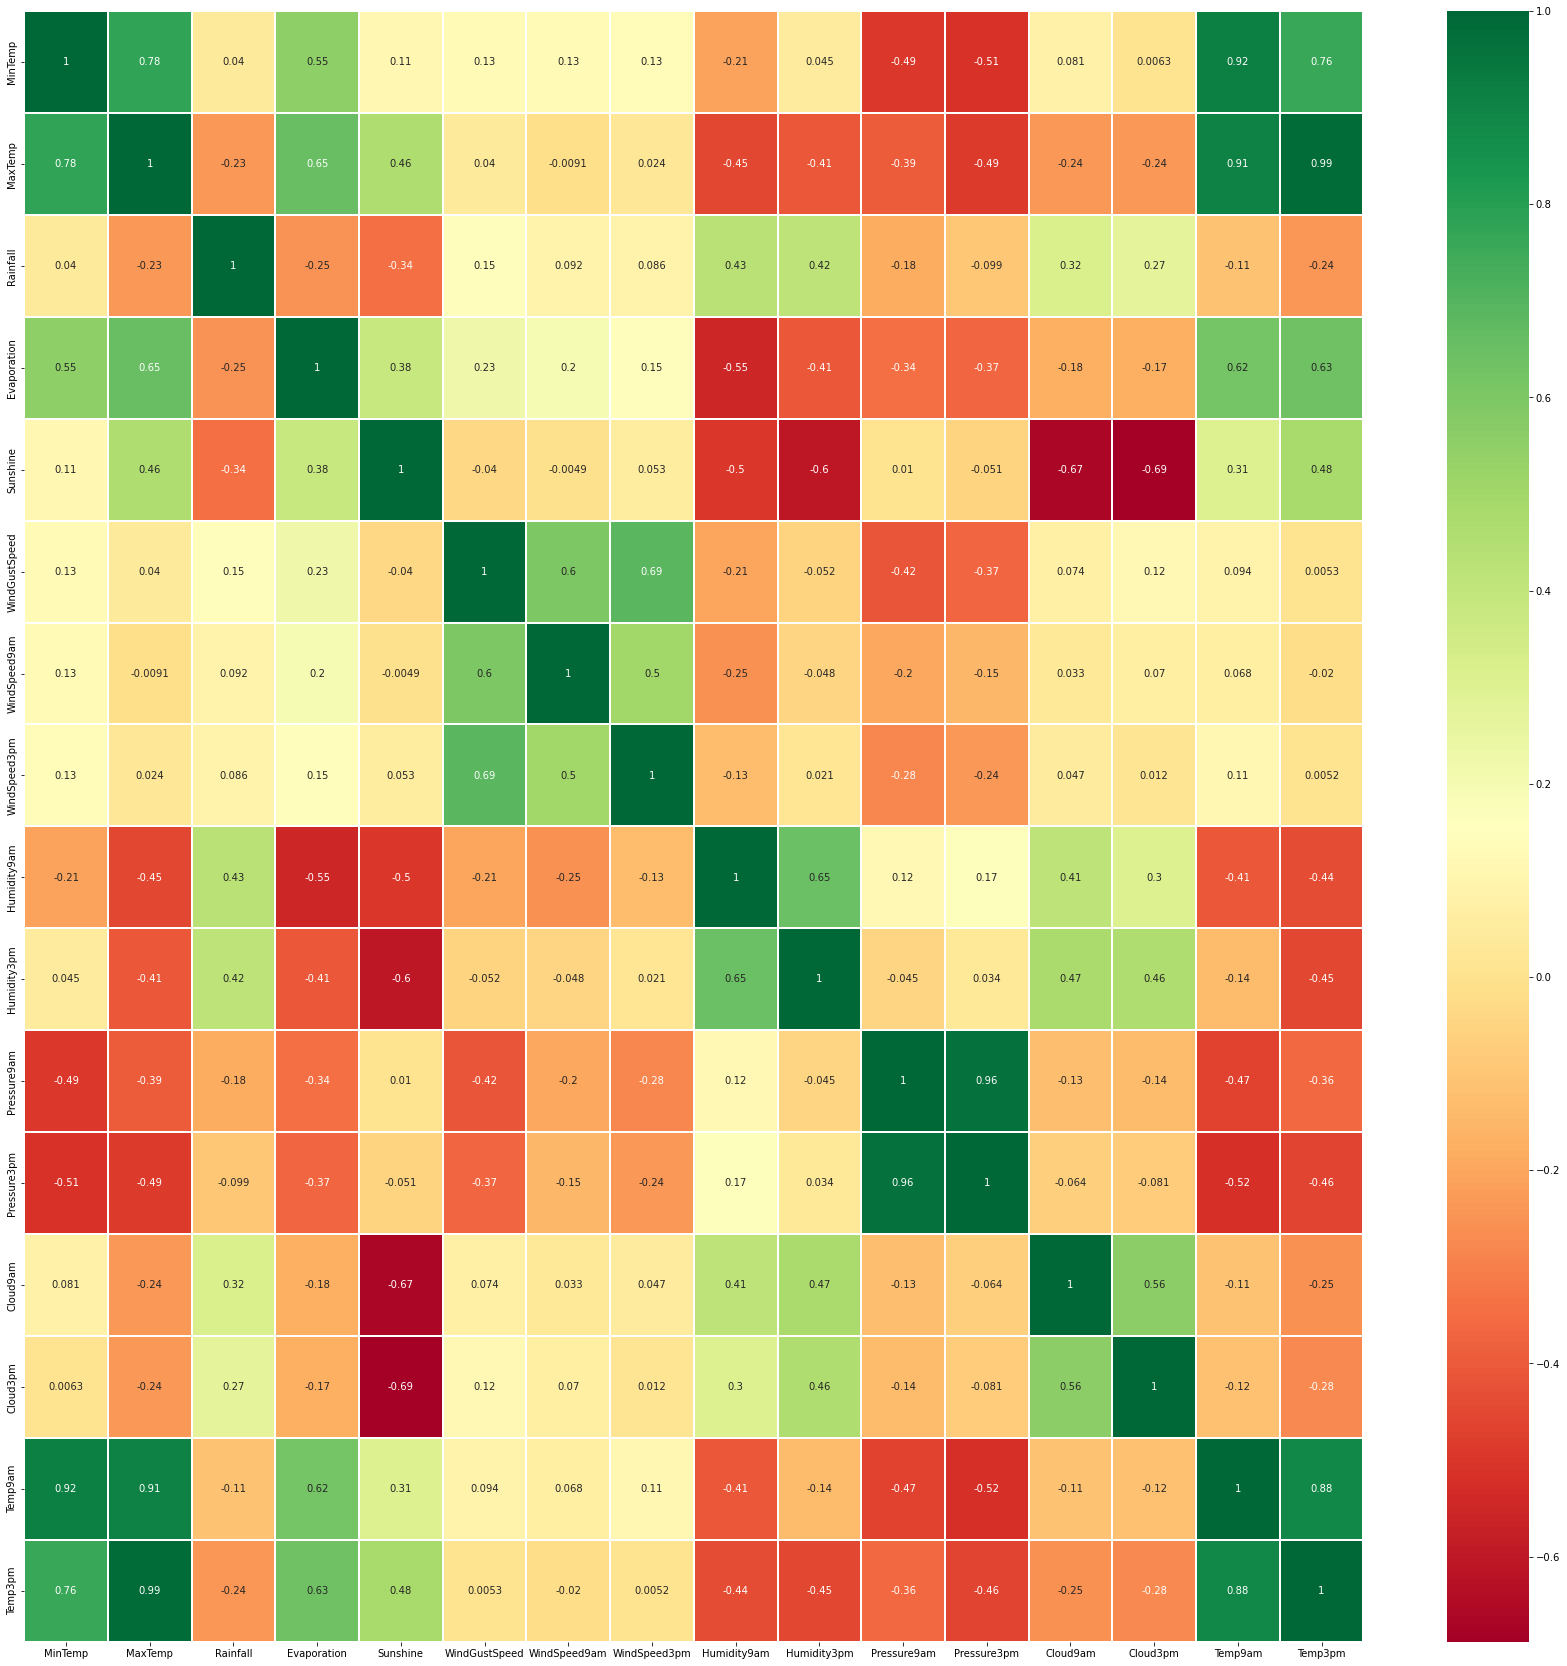

In [97]:
fig2 = plt.figure(figsize=(30,30))
fig2 = sns.heatmap(heatmap_after.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
plt.show()

Korelasi Pearson adalah alat analisis statistik yang digunakan untuk melihat keeratan hubungan linier antara 2 variabel yang skala datanya adalah interval atau rasio. Berikut ini adalah interpretasi besarnya nilai koefisien korelasi.
- 0 - 0,2 menyatakan hubungan keeratan sangat lemah,
- 0,2 - 0,4 menyatakan hubungan keeratan lemah,
- 0,4 - 0,7 menyatakan hubungan keeratan cukup kuat,
- 0,7 - 0,9 menyatakan hubungan keeratan kuat,
- 0,9 - 1 menyatakan hubungan keeratan sangat kuat.

Tanda positif dan negatif pada koefisien korelasi menunjukkan arah hubungan. Koefisien korelasi bertanda **positif artinya hubungannya berbanding lurus**, dimana semakin tinggi nilai variabel x maka nilai variabel y juga semakin tinggi dan semakin rendah nilai variabel x maka nilai variabel y juga semakin rendah. Koefisien korelasi bertanda **negatif artinya hubungannya berbanding terbalik**, dimana semakin tinggi nilai variabel x maka nilai variabel y semakin rendah dan semakin rendah nilai variabel x maka nilai variabel y semakin tinggi.[2]


setelah melakukan outlier handling didapatkan korelasi seperti diatas. nilai korelasi hampir tidak ada perbedaan dengan target. maka yang akan diambil untuk dimasukan kedalam model adalah feature "distance" dan "surge_multiplier" karena ada positive korelasi yang lemah sebesar 0.35 untuk distance dan korelasi sangat lemah untuk surge_multiplier sebesar 0.24 dengan price

### B. Feature Selecting Categorical data types

melakukan feature selecting categorical yang saya gunakan adalah merubah data categorical tersebut menjadi angka dengan menggunakan label encoder. 

In [ ]:
label_encoder = LabelEncoder()
x_train_cat_enc= x_train_outlier_clean.copy()
for col in x_train_cat_enc.select_dtypes(include='object').columns:
    x_train_cat_enc[col]=label_encoder.fit_transform(x_train_cat_enc[col])

x_train_cat_enc[obj_columns]



,id,datetime,timezone,source,destination,cab_type,product_id,name,short_summary,long_summary,icon
224722,432053,23256,0,9,10,1,4,8,5,4,2
483389,90763,11326,0,10,2,0,7,7,6,1,5
164048,19488,2989,0,4,9,1,1,0,6,4,4
316033,450026,26870,0,7,9,0,11,2,8,9,6
379521,206462,25179,0,10,9,0,11,2,6,9,5
...,...,...,...,...,...,...,...,...,...,...,...
371403,74502,20653,0,8,7,0,10,6,0,6,0
491263,125968,220,0,11,6,0,7,7,2,10,3
470924,157032,11050,0,10,6,1,1,0,6,1,4
491755,79901,14224,0,5,7,0,11,2,5,9,2


In [ ]:
heatmap_category = x_train_cat_enc[obj_columns].copy()
heatmap_category = pd.concat([heatmap_category, y_train], axis=1)

kemudian membuat variable heatmap_category untuk dibuatkan koreasi pearson heatmapnya.

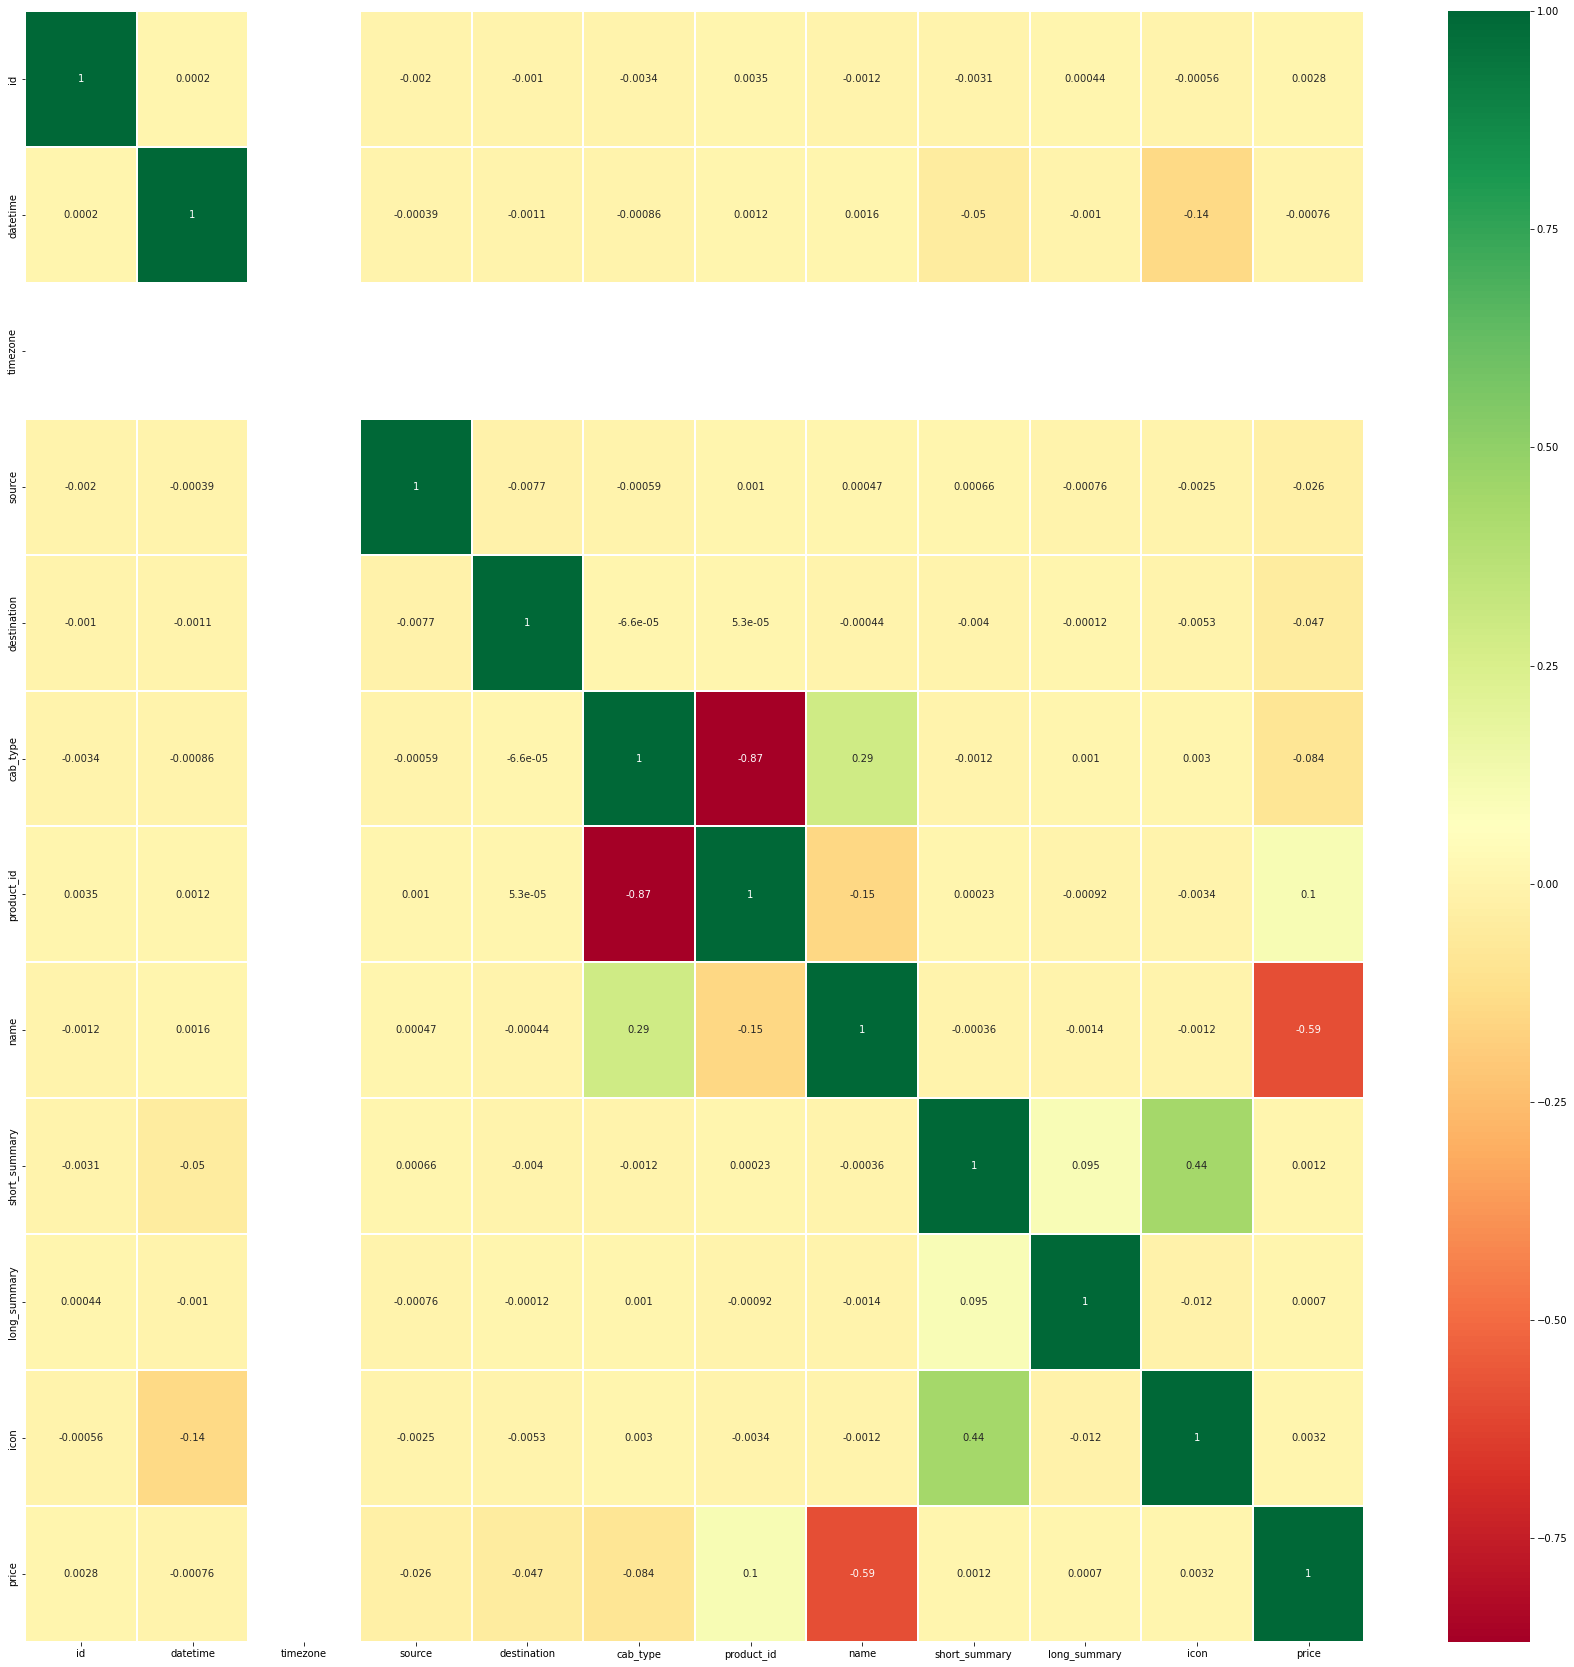

In [ ]:
fig3 = plt.figure(figsize=(30,30))
fig3 = sns.heatmap(heatmap_category.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
plt.show()

terdapat korelasi berbanding terbalik yang cukup kuat di feature 'name' dengan nilai -0.59 maka akan diambil feature tersebut.

untuk timezone tidak ada pearson correlationnya karena timezone hanya 1 kategori 'America/New_York' . maka dari itu feature ini dapat diabaikan

setelah mengetahui feature mana saja yang akan dimasukan kedalam model maka dilakukan pemilihan feature pada masing-masing data train dan test.

### C. Selecting x train

memilih name, distance dan surge_multiplier pada dataframe x train

In [ ]:
category_select = x_train_outlier_clean[['name']].copy()
number_select = x_train_outlier_clean[['distance','surge_multiplier']].copy()
x_train_select = pd.concat([category_select, number_select], axis=1)
x_train_select

,name,distance,surge_multiplier
224722,UberPool,1.30,1.0
483389,Shared,4.79,1.0
164048,Black,0.39,1.0
316033,Lux,2.14,1.0
379521,Lux,0.64,2.0
...,...,...,...
371403,Lyft XL,3.19,1.5
491263,Shared,1.05,1.0
470924,Black,1.57,1.0
491755,Lux,0.53,1.0


### D. Selecting X test feature

memilih name, distance dan surge_multiplier pada dataframe x test

In [ ]:
category_select_test = x_test[['name']].copy()
number_select_test = x_test[['distance','surge_multiplier']].copy()
x_test_select = pd.concat([category_select_test, number_select_test], axis=1)
x_test_select

,name,distance,surge_multiplier
411580,Lux Black,2.15,1.0
394176,Lux Black XL,2.97,1.0
202005,Black SUV,2.66,1.0
279384,Lyft,2.94,1.0
220662,Lux,2.29,1.0
...,...,...,...
414353,Lux Black XL,3.30,1.0
398629,Shared,1.73,1.0
628873,WAV,3.37,1.0
576533,Black SUV,1.21,1.0


## VI. Scaling & Encoding

### A. One Hot encoder x train data

melakukan one hot encoding fit dan transform pada data x train categorical yaitu 'name'

In [ ]:
hot_encoder = OneHotEncoder(sparse=False)

x_train_cat_encoder = hot_encoder.fit_transform(x_train_select['name'].values.reshape(-1,1))
df_x_train_cat_encoder = pd.DataFrame(x_train_cat_encoder, columns=x_train_select['name'].unique())
df_x_train_cat_encoder


,UberPool,Shared,Black,Lux,Lux Black XL,Lyft,UberX,WAV,UberXL,Black SUV,Lyft XL,Lux Black
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
490595,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
490596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
490597,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
490598,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### B. One hot encoder in x test data

melakukan one hot encoding transform pada data x test categorical yaitu 'name'

In [ ]:
x_test_cat_encoder = hot_encoder.transform(x_test_select['name'].values.reshape(-1,1))
df_x_test_cat_encoder = pd.DataFrame(x_test_cat_encoder, columns=x_test_select['name'].unique())
df_x_test_cat_encoder

,Lux Black,Lux Black XL,Black SUV,Lyft,Lux,UberXL,Lyft XL,WAV,UberPool,Shared,Black,UberX
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
127589,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
127591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
127592,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### C. Scaling numerical feature

melakukan scaling dengan fungsi StandardScaler untuk x train dan x test

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train_select[['distance','surge_multiplier']])
x_train_num_scaled = scaler.transform(x_train_select[['distance','surge_multiplier']])
x_test_num_scaled = scaler.transform(x_test_select[['distance','surge_multiplier']])


melakukan penggabungan x train dan x test yang telah diencoding dan discaling

In [ ]:
x_train_final  = np.concatenate((x_train_num_scaled,x_train_cat_encoder),axis=1)
x_test_final  = np.concatenate((x_test_num_scaled,x_test_cat_encoder),axis=1)


## VII. Model Definition

Linear regression adalah alat statistik yang dipergunakan untuk mengetahui pengaruh antara satu atau beberapa variabel terhadap satu buah variabel. Variabel yang mempengaruhi sering disebut variabel bebas, variabel independen atau variabel penjelas. (Wahyu, 2018)

setelah kita mengetahui korelasi dengan menggunakan pearson pada heatmap. kita menyeleksi feature yang memiliki keterikatan dengan target. feature merupakan variable independen dalam definisinya. Scikit-learn digunakan untuk membuat linear regresi semakin mudah. namun data harus diencoding dan dilakukan scaling agar model dapat memprediksi dengan baik 

>LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. (Scikit-learn, 2011)

algoritma linear regression akan melakukan fitting dengan koefisien untuk meminimalkan jumlah kuadrat residual variabel dependen dan variabel independen. dan model akan memberikan hasil prediksi sesuai dengan linear approximation.

Menggunakan scikit-learn sangat mudah hanya memanggil fungsi dan melakukan fit() dengan variabel dependen dan independen kemudain predict() dengan input variabel independen/ feature data. 

In [ ]:
model_lr= LinearRegression()
model_lr.fit(x_train_final,y_outlier_clean)

LinearRegression()

melakukan prediksi terhadap data x train dan x test

In [ ]:
y_pred_train = model_lr.predict(x_train_final)
y_pred_test = model_lr.predict(x_test_final)

## VIII. Model Evaluation

karena datanya bernilai continous maka digunakan evaluasi menggunakan R squared. R squared merupakan angka yang berkisar antara 0 sampai 1 yang mengindikasikan besarnya kombinasi variabel independen secara bersama – sama mempengaruhi nilai variabel dependen. Semakin mendekati angka satu, model yang dikeluarkan oleh regresi tersebut akan semakin baik. (Agung, 2018)

mean absolute error dan root mean squared error digunakan untuk mencari error dari hasil regresi linear model kita. untuk lebih jelasnya MSE dan RMSE adalah sebagai berikut:

- Mean Absolute Error (MAE): MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.

- Root mean squared error (RMSE): RMSE is a quadratic scoring rule that also measures the average magnitude of the error. It’s the square root of the average of squared differences between prediction and actual observation. (JJ, 2016)

In [ ]:
print('r square score on train data :',r2_score(y_outlier_clean,y_pred_train))
print('r square score on test data  :',r2_score(y_test,y_pred_test))

print('RMSE on train data           :',mean_squared_error(y_outlier_clean,y_pred_train))
print('RMSE on test data            :',mean_squared_error(y_test,y_pred_test))

print('MAE on Train Data            :',mean_absolute_error(y_outlier_clean,y_pred_train))
print('MAE on Test Data             :',mean_absolute_error(y_test,y_pred_test))


r square score on train data : 0.9277563595682528
r square score on test data  : 0.9257276978025742
RMSE on train data           : 6.280725314428599
RMSE on test data            : 6.4545338396348395
MAE on Train Data            : 1.7742794991146045
MAE on Test Data             : 1.7843445859951779


pada data R squared, score di datatrain bernilai 0.9277 dan score datatest 0.9257 artinya variabel independen sangat berkorelasi dengan variabel target atau dependen. kedua nilai tersebut juga sangat dekat yang berarti model tidak underfitting dan tidak overfitting. 

RMSE pada datatrain sebesar 6.280 dan datatest 6.454  sedangkan MAE pada datatrain 1.774 dan MAE pada datatest 1.784. masing-masing ukuran error bernilai sangat dekat ini memperkuat bahwa model tidak overfit atau underfit. 

Dalam model regresi, untuk mengetahui keakuratan kinerja model suatu algoritma, kita dapat mengambilnya dari nilai yang memiliki kesalahan kecil. Dengan kata lain, semakin kecil nilai error yang dihasilkan maka semakin dekat nilai atau jarak antara nilai aktual dengan nilai prediksi. (Khalimi, 2021)

nilai RMSE dan MAE dapat dibandingkan dengan model lain. semakin kecil nilai RMSE dan MAE maka semakin bagus model tersebut.


## IX. Model Inference

model inference dilakukan untuk mencoba menguji model dengan data baru diluar dari data train dan test split. data inference disimulasikan bahwa ada data baru yang akan di predict dari model yang sudah dibuat.

### A. Selecting inference data

pertama, melakukan pemilihan feature di data inference sesuai dengan kebutuhan model

In [ ]:
data_inf_select = data_inf[['name','distance','surge_multiplier']]
data_inf_select

,name,distance,surge_multiplier
0,Lyft,3.52,1.0
1,Lyft XL,1.47,1.0
2,Lux Black,0.73,1.0
3,Black,3.45,1.0
4,UberX,2.48,1.0
5,Lyft XL,2.43,1.0
6,Black,2.98,1.0
7,Black,4.48,1.0
8,UberXL,1.97,1.0
9,UberPool,3.04,1.0


### B. One Hot encoder Data Inference

kemudian melakukan one hot encoder dengan transform dari model yang sudah jadi

In [ ]:
data_inf_encoder = hot_encoder.transform(data_inf['name'].values.reshape(-1,1))
df_data_inf_encoder = pd.DataFrame(data_inf_encoder, columns=x_test_select['name'].unique())
df_data_inf_encoder

,Lux Black,Lux Black XL,Black SUV,Lyft,Lux,UberXL,Lyft XL,WAV,UberPool,Shared,Black,UberX
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


transform standard scaler dilakukan kepada feature berdata types numerical

### C. Scaling & Encoding data Inference

In [ ]:
data_inf_num_scaled = scaler.transform(data_inf_select[['distance','surge_multiplier']])

melakukan penggabungan dari encoding dan scaling

In [ ]:
data_inf_final = np.concatenate((data_inf_num_scaled,data_inf_encoder),axis=1)

kemudian melakukan prediction dengan model yang sudah jadi

### D. Predict & Evaluation

In [ ]:
y_pred_inf = model_lr.predict(data_inf_final)

karena data inference ini diambil dari data complete, kita masih bisa mengevaluasi hasilnya. namun pada kenyataanya kita tidak bisa evaluasi dengan cara yang sama dengan test atau train data. dibutuhakan feedback dari user dan real world untuk nilai evaluasinya. 

In [ ]:
print('r square score in inf data :',r2_score(data_inf['price'],y_pred_inf))
print('RMSE on inf data           :',mean_squared_error(data_inf['price'],y_pred_inf))
print('MAE on Inf Data            :',mean_absolute_error(data_inf['price'],y_pred_inf))

r square score in inf data : 0.9188743797806365
RMSE on inf data           : 4.211230945587158
MAE on Inf Data            : 1.70625


untuk nilai R square lebih turun sedikit ke 0.9188 dari 0.9257 pada data test. nilai ini sangat baik karena apabila model dideploy maka model akan perform sesuai ekspektasi.

Untuk nilai MAE itu sangat mirip dengan MAE dari data test dan train kurang lebih 1.7. sedangakn RMSE berubah dari 6.45 ke 4.21 ini dikarenakan dengan rumus RMSE yang pada dasarnya melihat variansi dari frekuensi jumlah error pada distribusinya. sejalan dengan apa yang dikatakan JJ.

> RMSE does not necessarily increase with the variance of the errors. RMSE increases with the variance of the frequency distribution of error magnitudes. Focusing on the upper bound, this means that RMSE has a tendency to be increasingly larger than MAE as the test sample size increases. This can problematic when comparing RMSE results calculated on different sized test samples, which is frequently the case in real world modeling. (JJ, 2018)

bila membandingkan RMSE dengan data test yang dilakukan sekarang dengan ukuran jumlah sample yang berbeda, ini mengakibatkan perbedaan RMSE pada data test dan data inference

## X. Pengambilan Kesimpulan

- Pada outlier handling terdapat data numerical yang dicapping dan ditrim. dari data x train yang bermula 510372 baris menjadi 490600 baris. dengan persentase data untuk training yang masih dipertahankan sebanyak 96.13%

- Feature Selection yang diambil untuk model adalah "name", "distance" dan "surge_multiplier". dengan masing-masing nilai pearson correlation -0.59, 0.35, dan 0.24. nilai ini sudah cukup membuktikan bahwa ketiga feature tersebut memiliki korelasi pearson yang cukup untuk dimasukan kedalam model.

- Hasil evaluasi linear regresi model didapatkan nilai R squares score datatrain 0.9277 dan score datatest 0.9257 artinya variabel independen sangat berkorelasi dengan variabel target atau variabel dependen. kedua nilai tersebut juga sangat dekat yang berarti model tidak underfitting dan tidak overfitting. 

- Hasil evaluasi model dengan data inference didapatkan nilai R square lebih turun sedikit ke 0.9188 dari 0.9257 pada data test. Untuk MAE data inference bernilai 1.706 dan MAE pada data test sebesar 1.784, keduanya mirip dengan MAE data inference turun sedikit. sedangkan RMSE berubah dari 6.45 ke 4.21 dikarenakan ukuran data yang berbeda. 



## XI. Referensi

Agung, 2018, Apa perbedaaan R Squared, R squared adjusted, dan R Squared Predicted., agungbudisantoso.com, Retrived from https://agungbudisantoso.com/apa-perbedaaan-r-squared-r-squared-adjusted-dan-r-squared-predicted/

Hidayat, A., 2012, Pengertian Analisis Regresi Korelasi Dan Cara Hitung., Statistikian., Retrieved from https://www.statistikian.com/2012/08/analisis-regresi-korelasi.html

JJ, 2016, MAE and RMSE — Which Metric is Better?, Human in a machine world., Retrived from https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d

Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011., citation link https://jmlr.csail.mit.edu/papers/v12/pedregosa11a.html

Wahyu, Eko., 2018, Linear Regression., Medium., Retrived from https://medium.com/@ekowahyus/linear-regression-5c41cdaf1bfd

Khalimi, Abdul M., 2021, Cara Hitung RMSE , MSE, MAPE, dan MAE Dengan Excel, Retrived from https://www.pengalaman-edukasi.com/2021/01/cara-menghitung-rmse-root-mean-square.html

[1] Quartiles, Boxes, and Whiskers., purplemath.com, Retrived from https://www.purplemath.com/modules/boxwhisk.htm

[2] Korelasi Pearson., rumusstatistik.com, Retrived From https://www.rumusstatistik.com/2019/06/korelasi-pearson.html#:~:text=Koefisien%20korelasi%20bertanda%20negatif%20artinya,nilai%20variabel%20y%20semakin%20tinggi.

